# Project Name: Sales Forecasting for Furniture Store

# Problem Statement

For a retail furniture store, predicting future sales is critical to avoiding inventory issues like overstocking
or under-stocking. The challenge lies in utilizing time series data from the superstore dataset to forecast
furniture sales for the next year accurately. This predictive insight ensures an optimal customer
experience, avoids losses, and maintains store sustainability.

# Import Basic Libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

# Load DataSet

In [2]:
store_sales = pd.read_csv("Super_Store_data.csv", encoding='cp1252')
store_sales.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


# Data Preparation

The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

Here we will analyze and prepare data to perform regression techniques:
1. Check dimensions and data types of the dataframe
2. Study summary statistics
3. Converting date into standard format
4. Check for missing values
5. Study correlation

In [3]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
#Checking dataset columns
store_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Dimensions of data set

In [5]:
#checking the shape of the dataset
print("No. of Rows :",store_sales.shape[0])
print("No. of columns :",store_sales.shape[1])

No. of Rows : 2121
No. of columns : 21


# Checking the missing values

In [6]:
#Check for empty elements
nvc = pd.DataFrame(store_sales.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/store_sales.shape[0],3)*100
print(nvc)

               Total Null Values  Percentage
Row ID                         0         0.0
Quantity                       0         0.0
Sales                          0         0.0
Product Name                   0         0.0
Sub-Category                   0         0.0
Category                       0         0.0
Product ID                     0         0.0
Region                         0         0.0
Postal Code                    0         0.0
Discount                       0         0.0
State                          0         0.0
Country                        0         0.0
Segment                        0         0.0
Customer Name                  0         0.0
Customer ID                    0         0.0
Ship Mode                      0         0.0
Ship Date                      0         0.0
Order Date                     0         0.0
Order ID                       0         0.0
City                           0         0.0
Profit                         0         0.0


Insights:
- The columns containing no missing values

# Statistical Summary

Here we take a look at the summary of each attribute.
This includes the count, mean, the min and max values as well as percentiles

In [9]:
store_sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


Since we will deal with the overall sale of the ithems in all of the stores we"ll need to disregard the columns representing the 
[ Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit' ] so we'll need to drop those twenty items.

In [8]:
#Check the time spam
store_sales['Order Date'].min(), store_sales['Order Date'].max()

('1/1/2017', '9/9/2017')

In [9]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment',
        'Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']

store_sales.drop(cols, axis = 1, inplace = True)

store_sales = store_sales.sort_values('Order Date')

In [10]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 845 to 964
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.7+ KB


In [11]:
store_sales.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [12]:
store_sales = store_sales.groupby("Order Date")['Sales'].sum().reset_index()

In [13]:
store_sales.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


# Indexing with Date

In [14]:
#Converting Order date from object datatype to dateTime datatype
store_sales["Order Date"] = pd.to_datetime(store_sales["Order Date"])
store_sales.set_index("Order Date", inplace = True)
store_sales.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [15]:
store_sales.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [16]:
store_sales.shape

(889, 1)

Insights:

   - Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky

In [17]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [ ]:
# reset the index for graphing purpose
store_sales = store_sales.copy()
store_sales.reset_index(inplace=True)

# Time Series Analysis

#### Now we analysis Time series data to do so we need to perform following steps

1. Visualizing Data
2. Sampling
3. Checking Stationarity
4. Decomposing

# Visualizing data

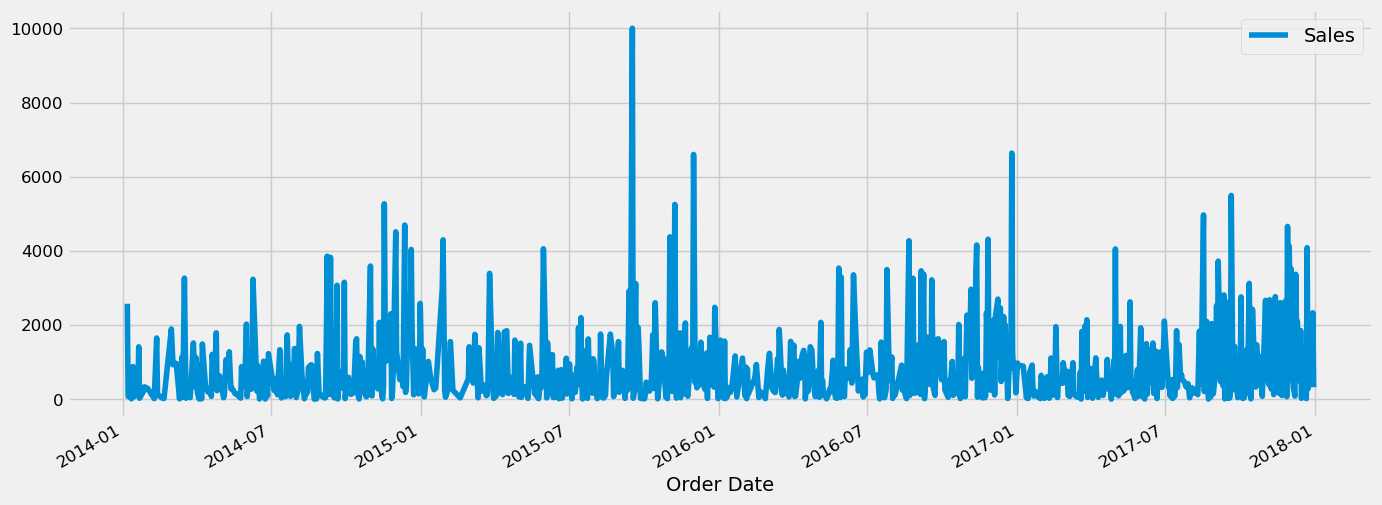

In [18]:
store_sales.plot(figsize=(15, 6))
plt.show()

Insights:
  - In the middle of july 2015 and january 2016, sales were higher, 
  - Almost higher than 10000
  - Between 2014 and 2018 the sales was higher at end of the 2015   

# Sampling

In [19]:
y = store_sales['Sales'].resample('MS').mean()

In [20]:
y.head(15)

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
Freq: MS, Name: Sales, dtype: float64

# Visually checking the time series for trend and other components

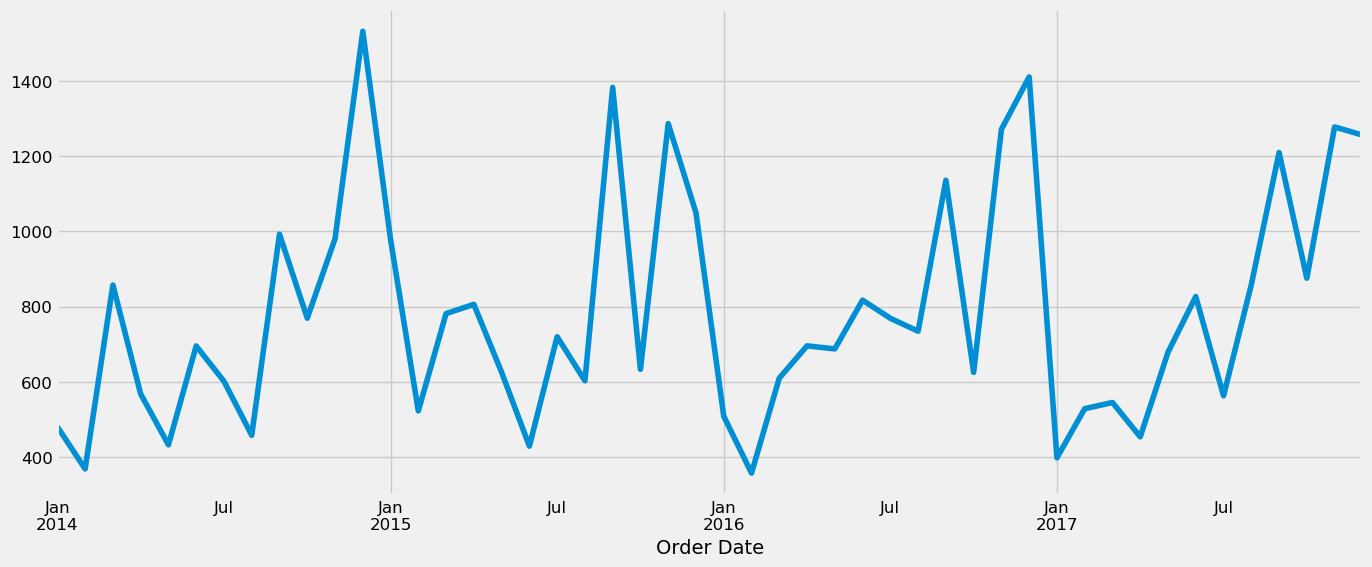

In [21]:
y.plot(figsize=(15,6))
plt.show()

Insights:
    
   - The plot clearly indicates that the time series has seasonality pattern. The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

# Checking the Stationarity

First step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

- Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

- Alternate Hypothesis: The series has no unit root (stationary)

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


Insights:
    
 - We can see that our statistic value of -5.191070 is less than the value of -3.621 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.
 
- The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

 # Decomposing

Decomposing the time series into three distinct components: trend, seasonality, and noise.

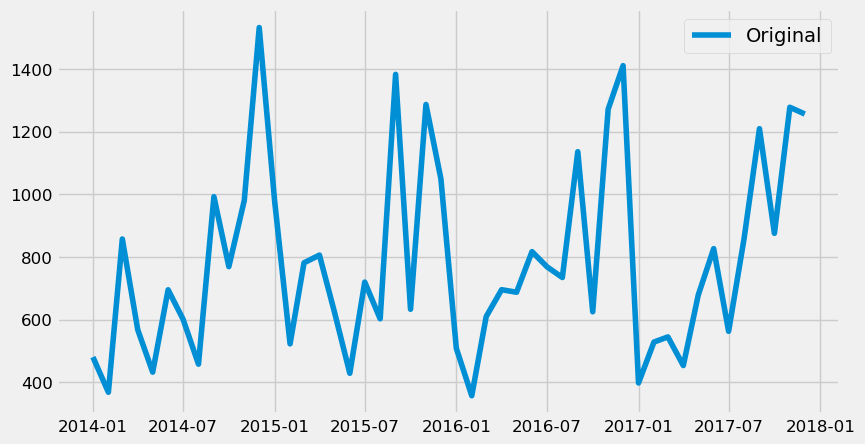

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Original
plt.figure(figsize=(9, 5))
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.show()

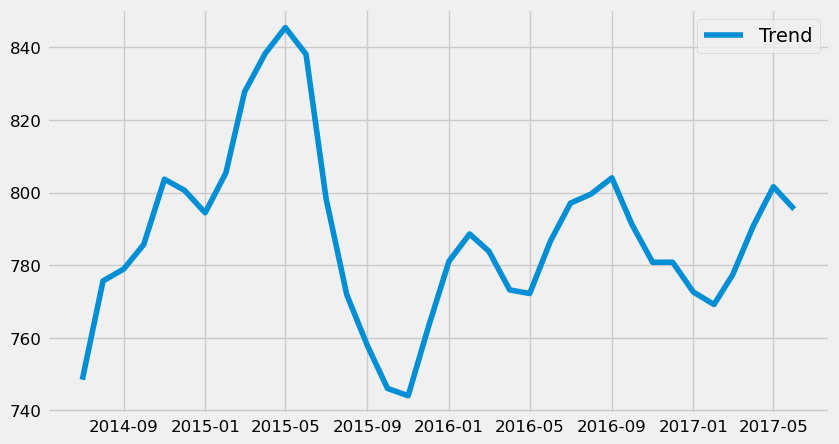

In [57]:
# Trend
plt.figure(figsize=(9, 5))
trend = seasonal_decompose(y).trend
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.show()

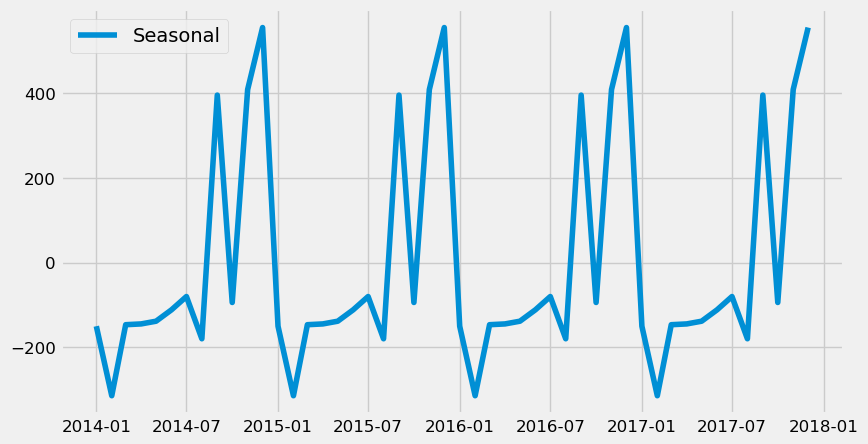

In [58]:
# Seasonal
plt.figure(figsize=(9, 5))
seasonal = seasonal_decompose(y).seasonal
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.show()

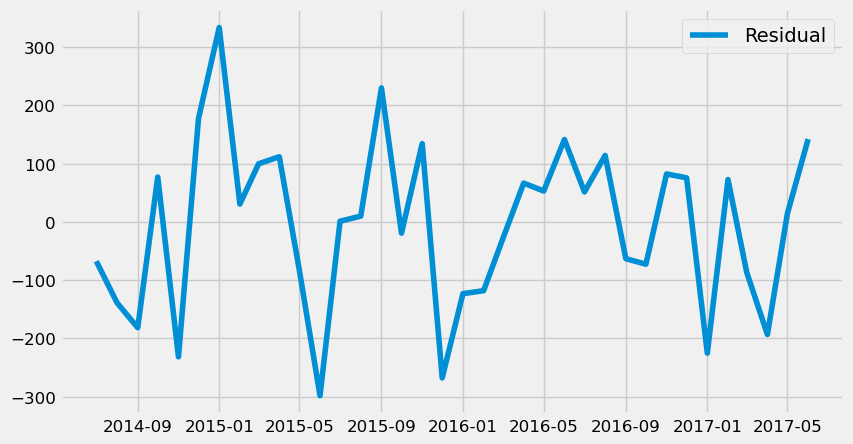

In [59]:
# Residual
plt.figure(figsize=(9, 5))
residual = seasonal_decompose(y).resid
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.show()

Insights:
   
  - The analysis of the decomposed components of the original time series data indicates that the stock prices exhibit instability, implying a lack of clear and consistent trends, while also revealing a noticeable seasonality, indicating predictable patterns at specific intervals. This information can be valuable for investors and analysts seeking to understand and predict the behavior of the stock in question.
   
   

# Time Series Forcasting using ARIMA

We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Insights:
   - The code is a utility for exploring and visualizing potential parameter combinations for SARIMA models, which is crucial for identifying the most suitable configuration to capture the underlying patterns and characteristics of a given time series data set with seasonality.

# Parameter Selection

We use “grid search” to find the optimal set of parameters that yields the best performance for our model

In [25]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1414.3428323587827
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793728
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1237.124688104104
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.248828030087
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758099
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2623.5158607856342
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091437
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673291
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5978892996652
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2398.727250073079
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576612869
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1508.3518391667412
ARIMA

Insights:
  - Here we are selecting those parameter those which has minimum A/C score

# Fitting the ARIMA Model

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3193.468     -0.000      1.000   -6260.082    6258.082
ar.S.L12       0.0274      0.512      0.053      0.957      -0.977       1.032
ma.S.L12      -1.0001   3193.125     -0.000      1.000   -6259.411    6257.411
sigma2      2.715e+04      0.050   5.38e+05      0.000    2.71e+04    2.71e+04


##### Running model diagnostiscs to check any unusual behaviour

 1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should exhibit properties akin to white noise.
 

2. Plots can serve to enhance our understanding of the error distribution beyond mere summary statistics. We anticipate the forecast errors to manifest a normal distribution centered around a mean of zero.


3. The Q-Q plot provides a swift means to assess the normality of the distribution of residual errors.


4. Lastly, visualizing the autocorrelation for the residual errors involves plotting the lag on the x-axis and the correlation between an observation and the lag variable on the y-axis. Correlation values range from -1 to 1 for negative and positive correlations, respectively. We do not expect any correlation among the residuals, as indicated by autocorrelation scores falling below the significance threshold, represented by dashed and dotted horizontal lines on the plot.

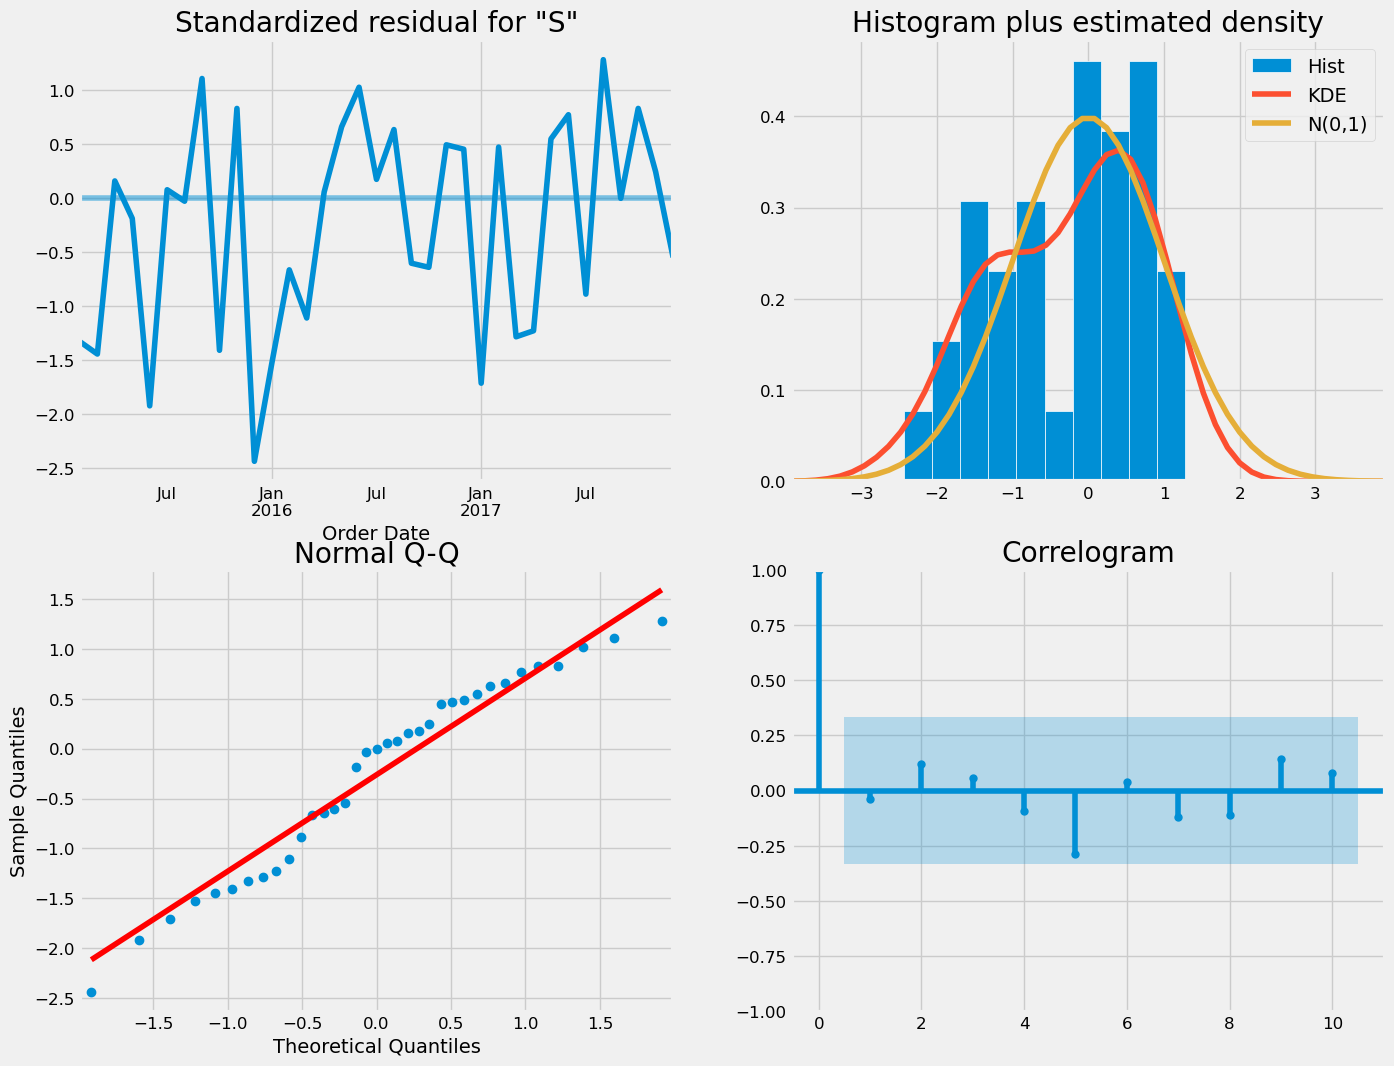

In [27]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Insights:
-   The model diagnostics indicates that the model residuals are near normally distributed

# Validating Forecasts

We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

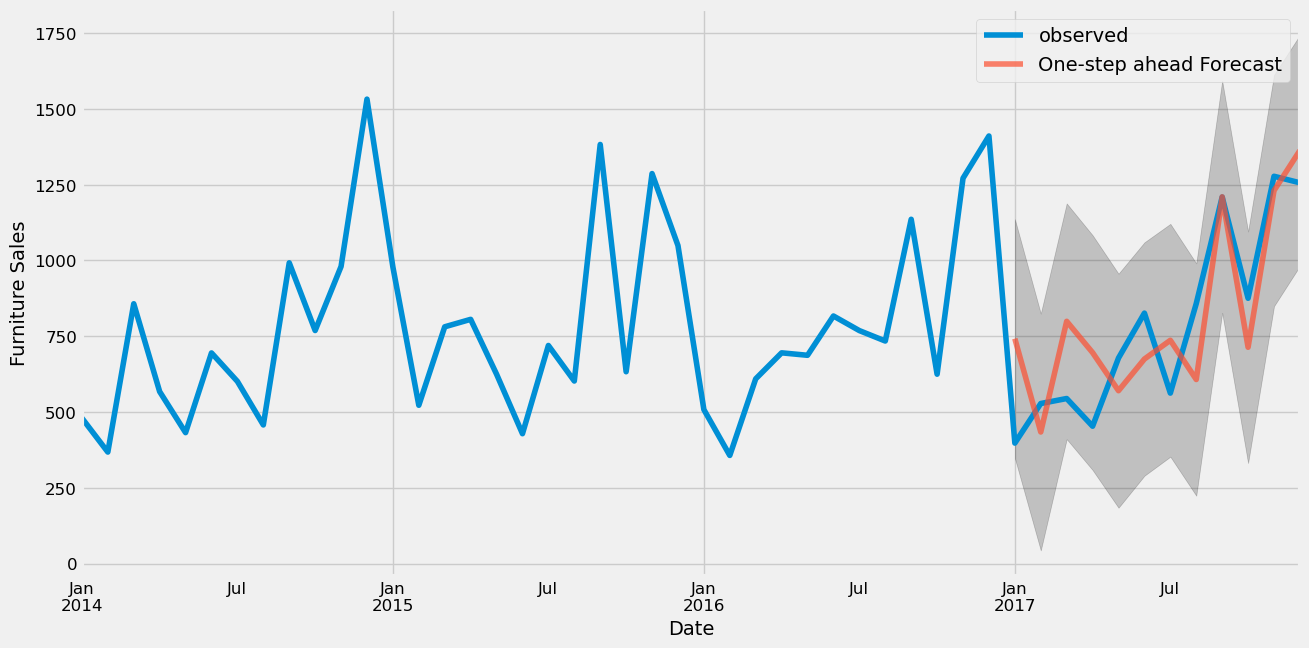

In [28]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Insights:
    
  - The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

# Calculating MSE and RMSE

In [29]:
#calculating MSE & RMSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 34904.03
The Root Mean Squared Error of our forecasts is 186.83


Insights:
   - MSE measures the average of the squares of the errors of an estimator. The average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 186.83 of the real sales.

# Visualizing the Forecast

            lower Sales  upper Sales
2018-01-01   250.479982  1000.538575
2018-02-01   116.186268   872.709997
2018-03-01   359.961518  1116.864800
2018-04-01   291.949995  1048.885179
2018-05-01   275.399690  1032.337682
2018-06-01   363.459521  1120.397766
2018-07-01   327.346799  1084.285087
2018-08-01   338.748712  1095.687186
2018-09-01   842.470297  1599.410429
2018-10-01   403.477211  1160.432258
2018-11-01   869.496959  1626.582485
2018-12-01   964.042826  1721.830974
2019-01-01   260.071017  1052.380011


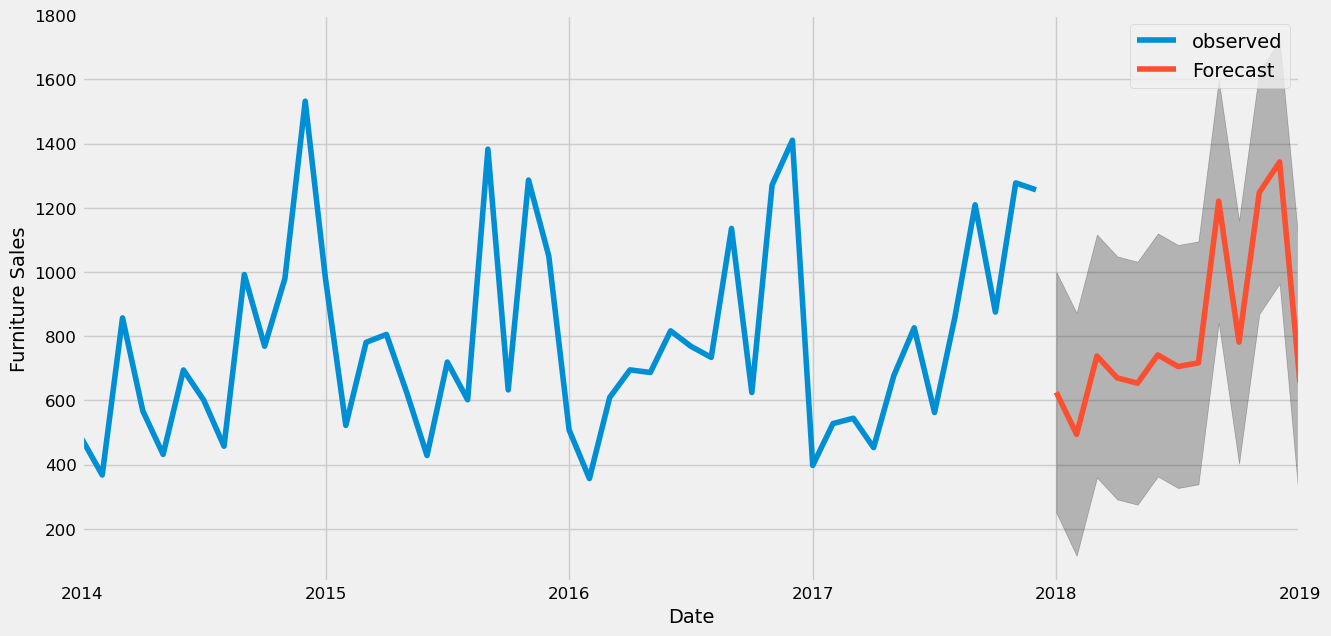

In [30]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

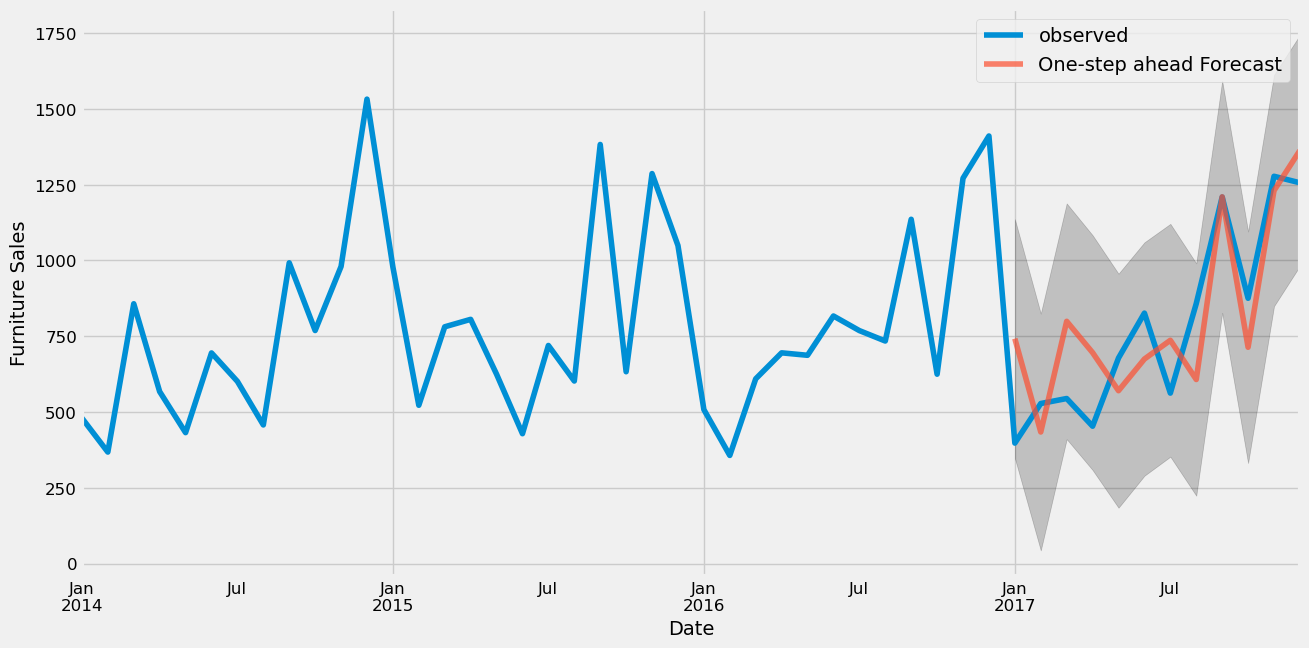

In [62]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Insights:
    
- The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

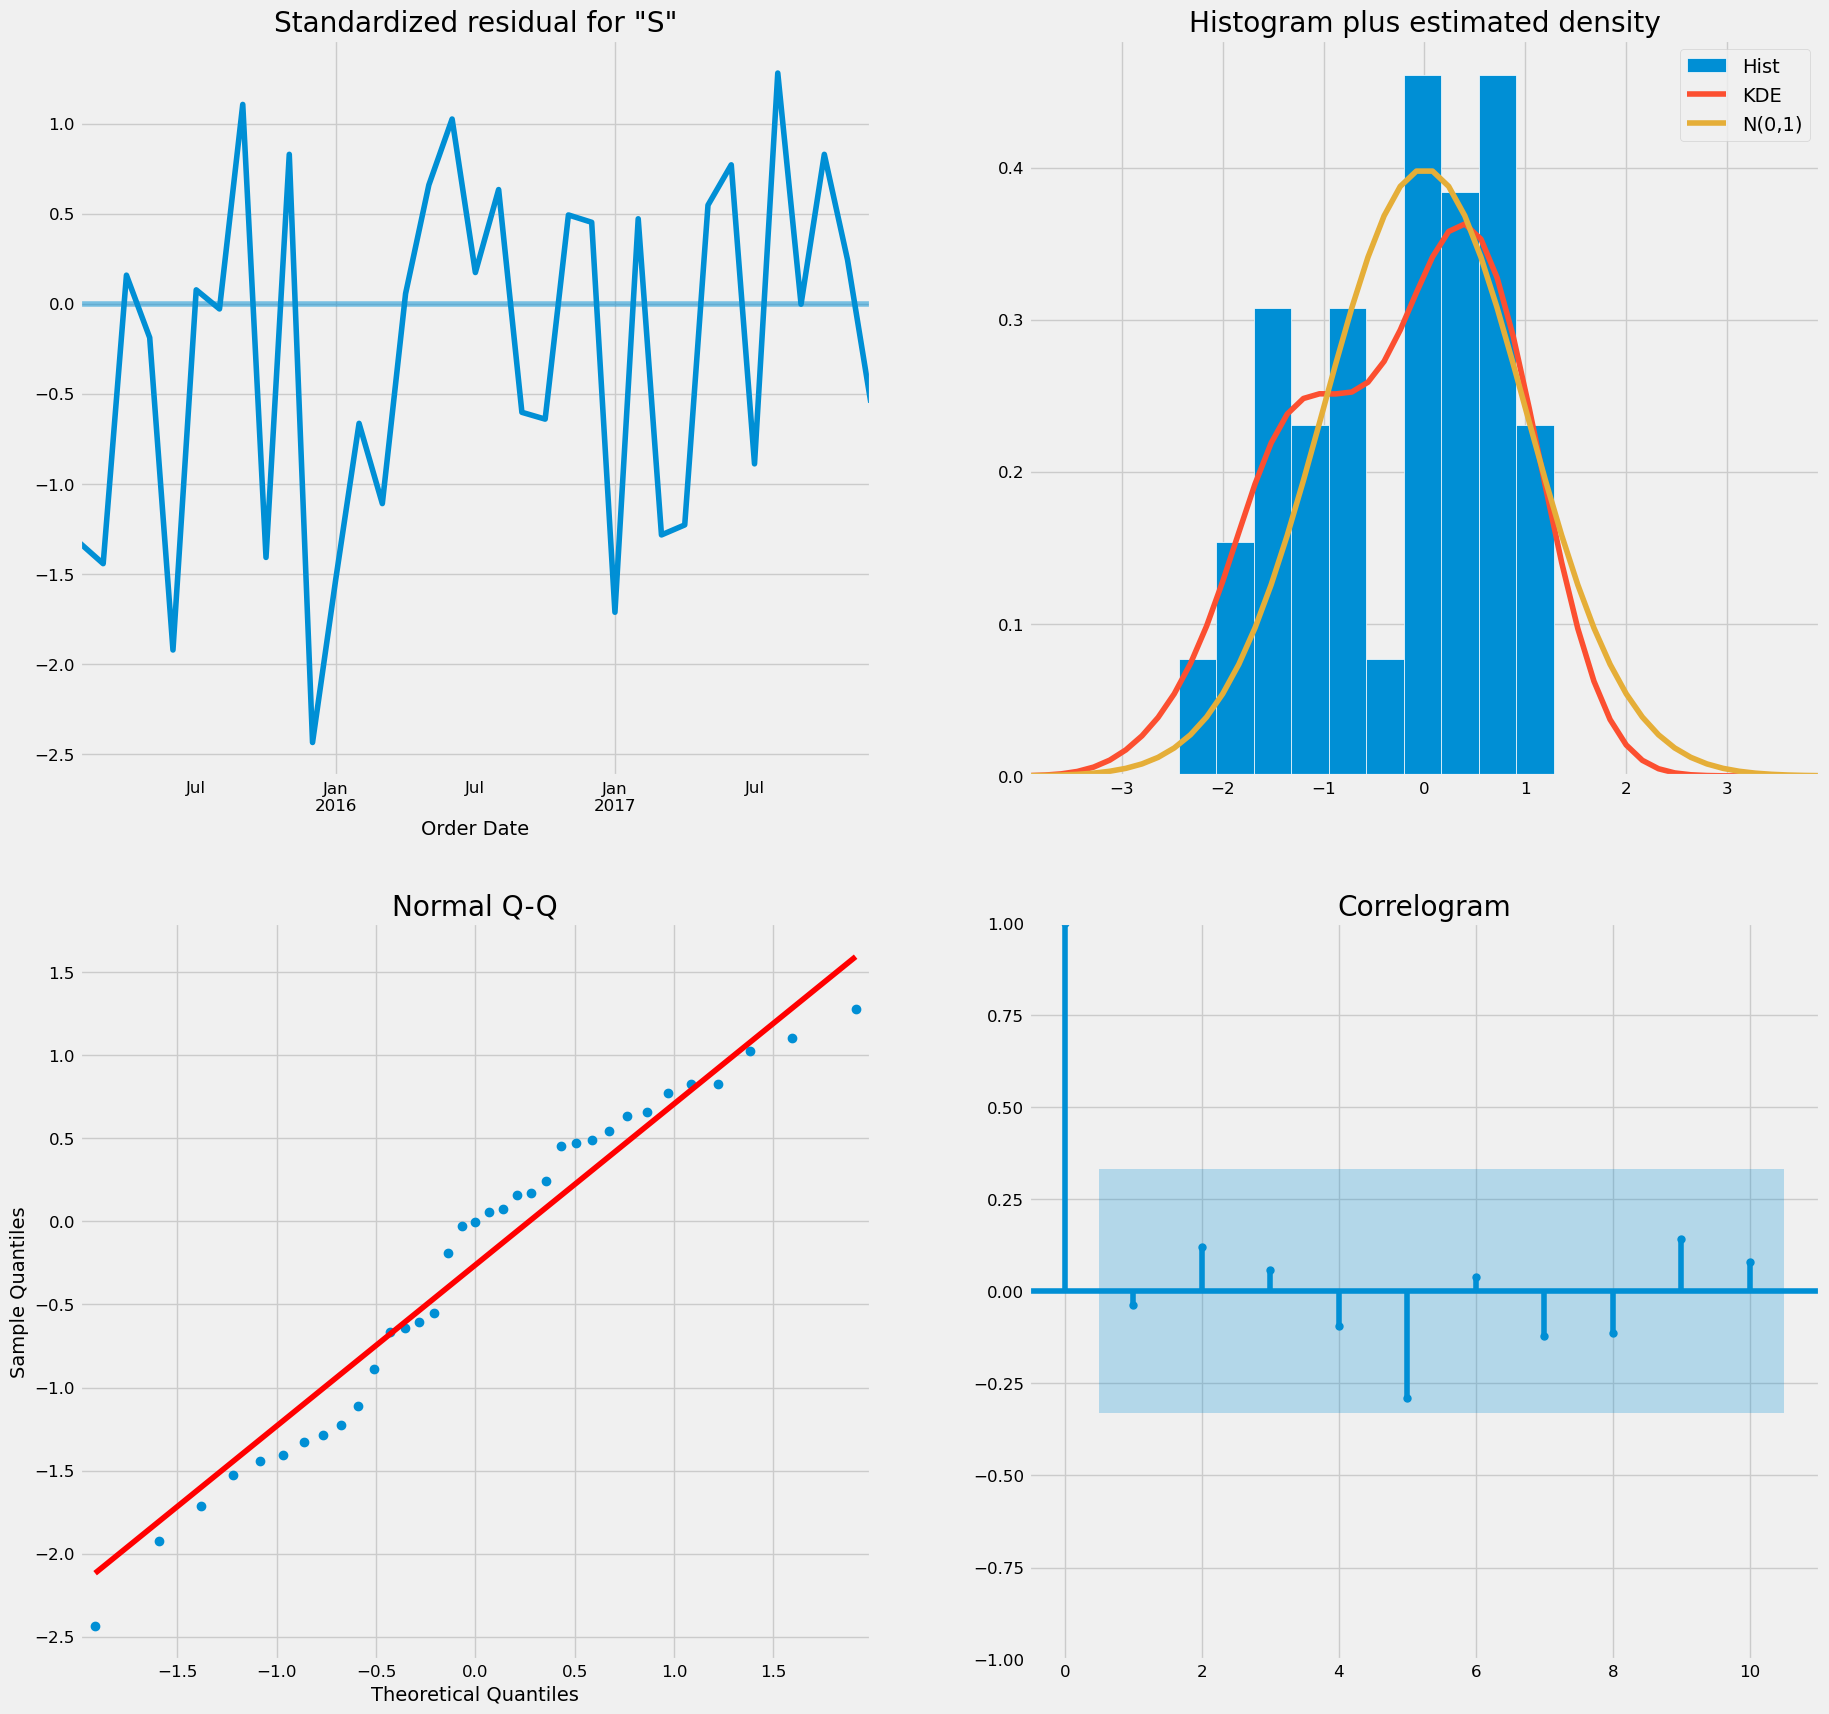

In [46]:
results.plot_diagnostics(figsize=(20,20))
plt.show()

Insights:

- The KDE plot of the residuals on the top right is almost similar with the normal distribution.

- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

# Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.